<a href="https://colab.research.google.com/github/Phoebe125/Exotic-Options/blob/main/Exotic_option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#Black Scholes Formula
def BS_formula(option_type, S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
      price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    elif option_type == 'put':
      price = - S * stats.norm.cdf(-d1) + K * np.exp(-r * T) * stats.norm.cdf(-d2)
    return price

In [ ]:
def european_mc(option_type, S0, K, r, T, sigma, I): #I번은 반복횟수
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N+1):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A)

  payoff = np.zeros(I)

  if option_type == 'call':
    payoff = np.exp(-r * T) * np.maximum((S[N] - K), 0)
  if option_type == 'put':
    payoff = np.exp(-r * T) * np.maximum((K - S[N]), 0)
  
  plt.plot(S[:,:50])

  V = np.mean(payoff)

  return V

In [ ]:
S = 100
K = 100
r = 0.02
T = 1
sigma = 0.2
I = 50000

8.890188221644781

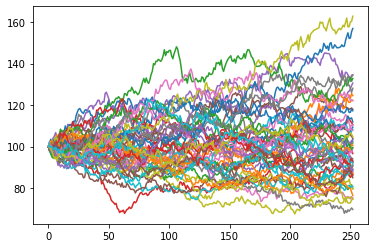

In [ ]:
european_mc('call',S, K, r, T, sigma, I)

문제1: 만기 전 마지막 일주일 동안의 평균 가격이 만기 기초자산 가격이 되는 American option의 가격을 구해보세요


In [ ]:
def american_mc(option_type, S0, K, r, T, sigma, I): #I번은 반복횟수
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A)

  #만기 전 일주일 동안의 평균 가격이 만기 기초자산 가격이 된다.
  for i in range(I):
    S[N, i] = np.mean(S[-7:-1, i])

  payoff = np.zeros(I)

  if option_type == 'call':
    payoff = np.exp(-r * T) * np.maximum((S[N] - K), 0)
  if option_type == 'put':
    payoff = np.exp(-r * T) * np.maximum((K - S[N]), 0)
  
  plt.plot(S[:,:50])

  V = np.mean(payoff)

  return V

American option using Monte Carlo:  8.846993116124935


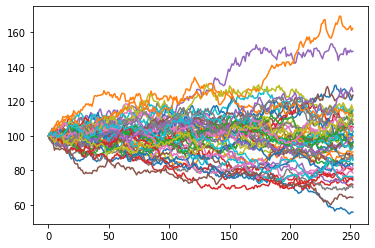

In [ ]:
print('American option using Monte Carlo: ', american_mc('call', S, K, r, T, sigma, I))

Barrier Option

In [ ]:
B = 110 #barrier

In [ ]:
def barrier_call(S0, K, r, T, sigma, I, B):
  #주가의 경로
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N+1):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A) #주가 설정

  Cuo = np.zeros(I) #up-and-out call
  Cui = np.zeros(I) #up-and-in call

  for i in range(I):
    if np.all(S[:, i] < B): #주가경로 전체가 barrier보다 밑에 있게 된다면
      Cuo[i] = S[N, i]       #Cuo가 유효함, payoff 넣어줌
    if np.any(S[:, i] > B): #주가경로중 하나라도 barrier 보다 위에 간다면
      Cui[i] = S[N, i]      #Cui가 유효함, payoff 넣어줌 

  #값이 있으면 0이아니고, 유효하지 않아서 값이 없으면 0임

  Cuo_payoff = np.exp(-r * T) * np.maximum(Cuo - K, 0)
  Cui_payoff = np.exp(-r * T) * np.maximum(Cui - K, 0)

  Cuo_value = np.mean(Cuo_payoff)
  Cui_value = np.mean(Cui_payoff)

  return Cuo_value, Cui_value

In [ ]:
Cuo, Cui = barrier_call(S, K, r, T, sigma, I, B)
print(Cuo, Cui)

0.15704465913942903 8.643704858539854


BS price:  8.916037278572539
european_mc:  9.0208093914855


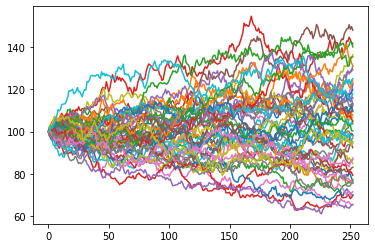

In [ ]:
print('BS price: ', BS_formula('call', S, K, r, T, sigma))
print('european_mc: ',european_mc('call', S, K, r, T, sigma, I))

In [ ]:
#barrier in-out parity
print('Cuo + Cui: ', Cuo + Cui, '\tC:', BS_formula('call', S, K, r, T, sigma))

Cuo + Cui:  8.800749517679282 	C: 8.916037278572539


문제2: 기초자산과 행사가격 등의 조건이 동일하고, Barrier가 80일때, barrier put option을 MC를 이용하여 pricing하고, barrier in-out parity가 성립함을 확인해보세요

In [ ]:
def barrier_put(S0, K, r, T, sigma, I, B):
  #주가의 경로
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N+1):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A) #주가 설정

  Puo = np.zeros(I) #up-and-out put
  Pui = np.zeros(I) #up-and-in put
  for t in range(I):
    Puo[t] = K
    Pui[t] = K

  for i in range(I):
    if np.all(S[:, i] < B): #주가경로 전체가 barrier보다 밑에 있게 된다면
      Puo[i] = S[N, i]       #Puo가 유효함, payoff 넣어줌
    if np.any(S[:, i] > B): #주가경로중 하나라도 barrier 보다 위에 간다면
      Pui[i] = S[N, i]      #Pui가 유효함, payoff 넣어줌 

  #값이 있으면 해당 값이고, 유효하지 않으면 K임 (call옵션과 payoff 산출방식이 달라서)

  #Put 옵션은 Call 옵션과 payoff가 다름
  Puo_payoff = np.exp(-r * T) * np.maximum(K - Puo, 0)
  Pui_payoff = np.exp(-r * T) * np.maximum(K - Pui, 0)

  Puo_value = np.mean(Puo_payoff)
  Pui_value = np.mean(Pui_payoff)

  return Puo_value, Pui_value

In [ ]:
Puo, Pui = barrier_put(S, K, r, T, sigma, I, B)
print(Puo, Pui)

5.504746320395585 1.4113955776329141


BS price:  6.93590460924807
european_mc:  6.926244326054961


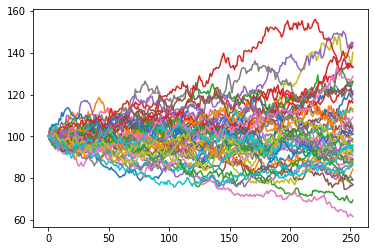

In [ ]:
print('BS price: ', BS_formula('put', S, K, r, T, sigma))
print('european_mc: ',european_mc('put', S, K, r, T, sigma, I))

In [ ]:
#barrier in-out parity
print('Puo + Pui: ', Puo + Pui, '\tP:', BS_formula('put', S, K, r, T, sigma))

Puo + Pui:  6.916141898028499 	P: 6.93590460924807


문제3: 기초자산 등의 조건이 위와 동일할 때, 기초자산이 knock-in 또는 knock-out 되었는지 관찰하는 시점이 매월 말 (관찰 시점 총 12개)인 Barrier call option을 pricing 해보세요

In [ ]:
def barrier_call12(S0, K, r, T, sigma, I, B):
  #주가의 경로
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N+1):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A) #주가 설정

  Cuo = np.zeros(I) #up-and-out call
  Cui = np.zeros(I) #up-and-in call

  Cuo_count = np.zeros(I)
  Cui_count = np.zeros(I)

  for i in range(I):
    for n in range(12): #총 관찰 시점: 12번
      if S[(n+1) * 21, i] > B: #해당 관찰 시점의 주가가 barrier보다 위에 있을 경우를 count함
        Cuo_count[i] += 1
        Cui_count[i] += 1
    
    if Cuo_count[i] == 0:   #주가가 barrier위에 올라간 횟수가 0번이면,
      Cuo[i] = S[N, i]       #Cuo가 유효함, payoff 넣어줌
    if Cui_count[i] > 0:   #주가가 barrier위에 올라간 횟수가 1번 이상이면,
      Cui[i] = S[N, i]       #Cui가 유효함, payoff 넣어줌

  #값이 있으면 0이아니고, 유효하지 않아서 값이 없으면 0임

  Cuo_payoff = np.exp(-r * T) * np.maximum(Cuo - K, 0)
  Cui_payoff = np.exp(-r * T) * np.maximum(Cui - K, 0)

  Cuo_value = np.mean(Cuo_payoff)
  Cui_value = np.mean(Cui_payoff)

  return Cuo_value, Cui_value

In [ ]:
Cuo, Cui = barrier_call12(S, K, r, T, sigma, I, B)
print(Cuo, Cui)

0.30933660019585335 8.641400443402093


In [ ]:
#barrier in-out parity
print('Cuo + Cui: ', Cuo + Cui, '\tP:', BS_formula('call', S, K, r, T, sigma))

Cuo + Cui:  8.950737043597947 	P: 8.916037278572539


In [ ]:
#비교해보면, 전체 시점이 아닌 12개의 시점에서만 확인하니, knock-out될 경우가 줄어들어 Cuo 가격이 상승하고, knock-in될 경우가 줄어들어, Cui 가격이 하락했음을 볼수있음

문제4: 기초자산 등의 조건이 위와 동일할 때, 7일 연속으로 기초자산 가격이 Barrier 위에 있어야 knock-in 또는 knock-out 되는 Parisian call option을 pricing 해보세요

In [ ]:
def barrier_call7(S0, K, r, T, sigma, I, B):
  #주가의 경로
  N = 252 * T
  dt = T / N

  S = np.zeros(((N+1), I))
  S[0] = S0

  for t in range(1, N+1):
    A = np.random.standard_normal(I) #I개의 난수 생성
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A) #주가 설정

  Cuo = np.zeros(I) #up-and-out call
  Cui = np.zeros(I) #up-and-in call

  Cuo_count = np.zeros(I)
  Cui_count = np.zeros(I)

  for i in range(I):
    for n in range(N-1): #7일 * 36번 = 252일
      if np.all(S[n : n+7, i]) > B: #7일 연속 barrier보다 위에 존재할 경우 
        Cuo_count[i] += 1
        Cui_count[i] += 1
    
    if Cuo_count[i] == 0:   #knock-out 된 횟수가 0번이면,
      Cuo[i] = S[N, i]       #Cuo가 유효함, payoff 넣어줌
    if Cui_count[i] > 0:   #knock-in 된 횟수가 1번 이상이면,
      Cui[i] = S[N, i]       #Cui가 유효함, payoff 넣어줌

  #값이 있으면 0이아니고, 유효하지 않아서 값이 없으면 0임

  Cuo_payoff = np.exp(-r * T) * np.maximum(Cuo - K, 0)
  Cui_payoff = np.exp(-r * T) * np.maximum(Cui - K, 0)

  Cuo_value = np.mean(Cuo_payoff)
  Cui_value = np.mean(Cui_payoff)

  return Cuo_value, Cui_value

In [ ]:
Cuo, Cui = barrier_call7(S, K, r, T, sigma, I, B)
print(Cuo, Cui)

8.844957721930305 0.0


In [ ]:
#barrier in-out parity
print('Cuo + Cui: ', Cuo + Cui, '\tP:', BS_formula('call', S, K, r, T, sigma))

Cuo + Cui:  9.042265374770384 	P: 8.916037278572539


Rainbow option
(기초자산이 2개 이상)

call payoff(max of three) = max(max(ST1, ST2, ST3)-K, 0)

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.0 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
#신한금융지주, 삼성전자, 현대차
sinhan = yf.download('055550.KS', '2020-04-09')['Close']
samsung = yf.download('005930.KS', '2020-04-09')['Close']
hyundai = yf.download('005380.KS', '2020-04-09')['Close'] #모두 배당이 없다는 가정하에 Close 사용

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks = pd.DataFrame()
stocks['Sinhan'] = sinhan
stocks['Samsung'] = samsung
stocks['Hyundai'] = hyundai

In [ ]:
stocks = stocks.pct_change().round(4)
stocks.dropna(inplace=True)
print(stocks.shape)
stocks.head()

(507, 3)


,Sinhan,Samsung,Hyundai
Date,,,
2020-04-10,0.0338,0.0031,0.0268
2020-04-13,-0.0189,-0.0193,-0.0191
2020-04-14,0.0193,0.0145,0.0225
2020-04-16,-0.0344,0.0000,-0.0090
2020-04-17,0.0160,0.0490,0.0141


In [ ]:
annual_vol = round(stocks.std() * np.sqrt(252), 2)
annual_vol

Sinhan     0.29
Samsung    0.24
Hyundai    0.38
dtype: float64

In [ ]:
corr = stocks.corr()
corr #세 주식 간의 상관관계도 구해야한다

,Sinhan,Samsung,Hyundai
Sinhan,1.000000,0.416985,0.343300
Samsung,0.416985,1.000000,0.516927
Hyundai,0.343300,0.516927,1.000000


In [ ]:
#correlated된 난수 생성
L = np.linalg.cholesky(corr) #춀렌스키 분해한 low triangle나옴
A = np.random.standard_normal((3,I)) 
B = L @ A
B = pd.DataFrame(B)
B.T.corr()

,0,1,2
0,1.000000,0.418973,0.344759
1,0.418973,1.000000,0.517720
2,0.344759,0.517720,1.000000


In [ ]:
I = 50000
r = 0.02
T = 1
N = 252 * T
dt = 1 / N

S1 = np.zeros(((N+1), I))
S2 = np.zeros(((N+1), I))
S3 = np.zeros(((N+1), I))

S1[0], S2[0], S3[0] = 100,100,100 #초기값 모두 100

for t in range(1, N+1):
  L = np.linalg.cholesky(corr)
  A = np.random.standard_normal((3,I)) #I개의 난수 생성
  B = L @ A

  S1[t] = S1[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * B[0])
  S2[t] = S2[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * B[1])
  S3[t] = S3[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * B[2])

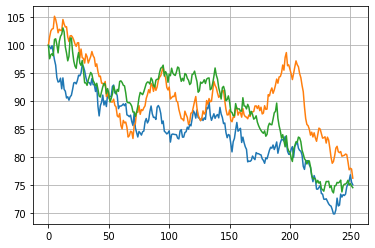

In [ ]:
plt.plot(pd.DataFrame([S1[:,1], S2[:,1], S3[:,1]]).T) 
plt.grid(True)

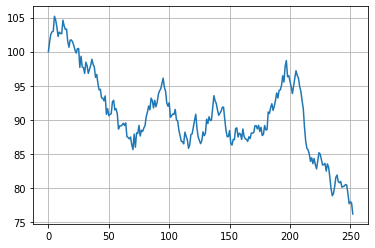

In [ ]:
S_max = np.zeros(((N+1), I))
for t in range(N+1):
  S_max[t] = np.maximum(S1[t], S2[t], S3[t])
plt.plot(S_max[:,1]) #큰 것만 저장
plt.grid(True)

In [ ]:
#payoff
payoff = np.exp(-r * T) * np.maximum(S_max - K, 0)
rainbow_call = payoff.mean()
print(rainbow_call)

8.83192183814327


Least Square Monte Carlo Simulation

출처: 금융 파이썬 쿡북

In [ ]:
S0 = 36
K = 40
sigma = 0.2
T = 1
N = 252
dt = 1/N
I = 100000
discount_factor = np.exp(-r * dt)
poly_degree = 2 #2차까지 고려, 이토레마에서 2차까지만 하고 3차 이상은 안하는 논리를 따라간듯하다

In [ ]:
#주가의 경로 생성
S = np.zeros(((N+1), I))
S[0] = S0

for t in range(1, N+1):
  A = np.random.standard_normal(I) #I개의 난수 생성
  S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * A)

In [ ]:
S = S.T
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,36.0,35.851273,35.333790,35.293959,35.019723,35.539558,35.675807,35.252225,35.519110,35.666383,...,36.574824,36.446351,36.669048,36.348220,37.197628,37.103236,36.404225,36.722258,36.704091,36.630579
1,36.0,35.005026,34.975024,34.433815,35.048840,35.180907,35.595957,35.828137,36.280992,35.918920,...,35.859514,35.411286,35.458554,35.911685,37.326844,37.468100,37.523881,37.428440,37.423476,38.057319
2,36.0,36.181799,36.345192,35.655931,35.916573,36.700737,37.129101,36.565933,36.523035,37.125653,...,29.956603,29.585750,29.665682,29.316127,29.131052,29.556203,29.352030,28.861270,28.609506,28.415187
3,36.0,35.922838,35.718923,35.855726,35.547341,34.726088,35.393600,35.839758,35.776456,36.151398,...,35.034831,34.865060,34.846820,35.019536,34.630297,33.623104,33.398153,33.258076,33.575051,33.967918
4,36.0,36.393772,36.371471,36.824542,37.282197,36.777930,37.528575,36.875902,37.127426,37.573030,...,39.178946,39.027282,38.724892,39.161043,38.992280,39.498261,38.937335,39.168927,38.902146,38.461854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,36.0,36.288711,36.216010,35.857728,35.921271,35.219285,34.438738,34.466110,34.451116,34.119032,...,23.791697,24.319636,24.688597,24.534176,24.359541,23.901136,24.112005,24.432733,24.694759,24.601358
99996,36.0,36.368987,36.686771,36.437628,36.752063,36.085027,36.514129,36.348103,36.687210,36.460441,...,35.785254,35.662393,34.935253,35.565073,35.958828,36.093441,35.755292,36.377137,36.134953,36.297405
99997,36.0,36.111392,35.610925,35.576389,35.981002,36.713239,36.811732,36.710687,36.419277,36.279032,...,36.301200,36.535346,36.373287,36.389967,37.243156,36.663073,37.277451,37.408315,36.565444,36.111282
99998,36.0,36.361830,36.915471,36.887446,36.643890,36.201943,36.156291,37.286462,36.704158,37.213375,...,43.515653,44.025516,44.160592,44.715819,44.880825,44.996914,45.464385,45.458455,44.926397,44.714310


In [ ]:
payoff = np.maximum(K-S, 0)
pd.DataFrame(payoff) #당장 행사했을때의 가치

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,4.0,4.148727,4.666210,4.706041,4.980277,4.460442,4.324193,4.747775,4.480890,4.333617,...,3.425176,3.553649,3.330952,3.651780,2.802372,2.896764,3.595775,3.277742,3.295909,3.369421
1,4.0,4.994974,5.024976,5.566185,4.951160,4.819093,4.404043,4.171863,3.719008,4.081080,...,4.140486,4.588714,4.541446,4.088315,2.673156,2.531900,2.476119,2.571560,2.576524,1.942681
2,4.0,3.818201,3.654808,4.344069,4.083427,3.299263,2.870899,3.434067,3.476965,2.874347,...,10.043397,10.414250,10.334318,10.683873,10.868948,10.443797,10.647970,11.138730,11.390494,11.584813
3,4.0,4.077162,4.281077,4.144274,4.452659,5.273912,4.606400,4.160242,4.223544,3.848602,...,4.965169,5.134940,5.153180,4.980464,5.369703,6.376896,6.601847,6.741924,6.424949,6.032082
4,4.0,3.606228,3.628529,3.175458,2.717803,3.222070,2.471425,3.124098,2.872574,2.426970,...,0.821054,0.972718,1.275108,0.838957,1.007720,0.501739,1.062665,0.831073,1.097854,1.538146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,3.711289,3.783990,4.142272,4.078729,4.780715,5.561262,5.533890,5.548884,5.880968,...,16.208303,15.680364,15.311403,15.465824,15.640459,16.098864,15.887995,15.567267,15.305241,15.398642
99996,4.0,3.631013,3.313229,3.562372,3.247937,3.914973,3.485871,3.651897,3.312790,3.539559,...,4.214746,4.337607,5.064747,4.434927,4.041172,3.906559,4.244708,3.622863,3.865047,3.702595
99997,4.0,3.888608,4.389075,4.423611,4.018998,3.286761,3.188268,3.289313,3.580723,3.720968,...,3.698800,3.464654,3.626713,3.610033,2.756844,3.336927,2.722549,2.591685,3.434556,3.888718
99998,4.0,3.638170,3.084529,3.112554,3.356110,3.798057,3.843709,2.713538,3.295842,2.786625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
value = np.zeros_like(payoff) #payoff랑 똑같은형태인 0으로 이루어진 값
value[:, -1] = payoff[:, -1]
pd.DataFrame(value)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.369421
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.942681
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.584813
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.032082
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.538146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.398642
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.702595
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.888718
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
for t in range(N-1, 0, -1): #252 --> 0
  regression = np.polyfit(S[:,t], value[:,t+1] * discount_factor, poly_degree) # 독립변수, 종속변수, 몇차인지 
  continuation_value = np.polyval(regression, S[:,t])
  value[:,t] = np.where(
      payoff[:,t] > continuation_value,
      payoff[:,t],#앞 조건을 만족한다면
      value[:,t+1] * discount_factor
  )

In [ ]:
pd.DataFrame(value)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.0,3.302964,3.303226,3.303489,3.303751,3.304013,3.304275,3.304537,3.304800,3.305062,...,3.367015,3.367282,3.367550,3.367817,3.368084,3.368352,3.368619,3.368886,3.369154,3.369421
1,0.0,7.785817,7.786434,7.787052,7.787671,7.788289,7.788907,7.789525,7.790143,7.790761,...,1.941294,1.941448,1.941602,1.941756,1.941910,1.942064,1.942218,1.942373,1.942527,1.942681
2,0.0,5.960657,5.961130,5.961604,5.962077,5.962550,5.963023,5.963496,5.963970,5.964443,...,10.043397,10.414250,10.334318,10.683873,10.868948,10.443797,10.647970,11.138730,11.390494,11.584813
3,0.0,8.271036,8.271693,8.272349,8.273006,8.273663,8.274319,8.274976,8.275633,8.276290,...,4.965169,5.134940,5.153180,4.980464,5.369703,6.376896,6.601847,6.741924,6.424949,6.032082
4,0.0,7.774359,7.774976,7.775593,7.776210,7.776828,7.777445,7.778062,7.778679,7.779297,...,1.537048,1.537170,1.537292,1.537414,1.537536,1.537658,1.537780,1.537902,1.538024,1.538146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,8.327963,8.328624,8.329285,8.329946,8.330607,8.331268,8.331929,8.332591,8.333252,...,15.387647,15.388868,15.390090,15.391311,15.392533,15.393754,15.394976,15.396198,15.397420,15.398642
99996,0.0,7.869861,7.870486,7.871110,7.871735,7.872360,7.872985,7.873609,7.874234,7.874859,...,5.063943,5.064345,5.064747,3.700832,3.701126,3.701420,3.701714,3.702008,3.702301,3.702595
99997,0.0,3.812018,3.812321,3.812624,3.812926,3.813229,3.813531,3.813834,3.814137,3.814440,...,3.885941,3.886249,3.886558,3.886866,3.887175,3.887483,3.887792,3.888100,3.888409,3.888718
99998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
american_put = np.mean(value[:,1] * discount_factor)
american_put #수렴이 안됐음 싶음... 원래는 4.49, 가능하면 수렴되게 고쳐서 단톡방에 올려주기~!

4.916444867884228